# 6.3 Geographic Visualization
# Contents
1. Importing libraries 
2. Importing data  
3. Data wrangling and merging
4. Data cleaning
5. Plotting a choropleth

# 1. Importing Libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import geopandas as gpd
import geoplot

In [2]:
# This command prompts matplotlib visuals to appear in the notebook.

%matplotlib inline

# 2. Importing Data

In [3]:
# Creating common folder path
path = r'C:\Users\Mukund\Desktop\Career Foundry\Covid-19 Vaccination Progress' 

In [4]:
path

'C:\\Users\\Mukund\\Desktop\\Career Foundry\\Covid-19 Vaccination Progress'

In [5]:
# Import ".shp" file for the countries shape outline using the Geopandas `read_csv` command.

country = gpd.read_file(os.path.join(path, 'Data', 'Original_Data', 'World_Countries.shp'))

In [6]:
# Checking head of data
country.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [7]:
country.shape

(252, 2)

In [8]:
# Importing Corona vaccination Data
df_CVN = pd.read_csv(os.path.join(path, 'Data', 'Prepared_Data', 'Country_Vaccinations_Checked.csv'), index_col = False)

In [9]:
# Checking the head data
df_CVN.head()

,Country,iso_code,Date,Total_No_Of_vaccinations,Total_No_People_Vaccinated,Total_No_Of_People_Fully_Vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,Total_No_People_Vaccinated_Per_Hundred,Total_No_OF_People_Fully_Vaccinated_Per_Hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,22/02/2021,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,23/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,24/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,25/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,26/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [10]:
df_CVN.shape

(36063, 15)

# 2. Data wrangling and merging

We did not need to do wrangling of datasets as the Country columns in both datasets having same values in same format and we just need to rename the country column from shape dataset to match with country column from vaccination dataset.

In [11]:
country.rename(columns = {'COUNTRY' : 'Country'}, inplace = True)

In [12]:
country.head()

,Country,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [13]:
country.isnull().sum()

Country     0
geometry    0
dtype: int64

In [14]:
# Merging both data sets
country_VCN = country.merge(df_CVN, on = 'Country', how = 'inner', indicator = True)

In [15]:
type(country_VCN)

geopandas.geodataframe.GeoDataFrame

In [16]:
country_VCN.shape

(29686, 17)

In [17]:
country_VCN.head()

,Country,geometry,iso_code,Date,Total_No_Of_vaccinations,Total_No_People_Vaccinated,Total_No_Of_People_Fully_Vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,Total_No_People_Vaccinated_Per_Hundred,Total_No_OF_People_Fully_Vaccinated_Per_Hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,_merge
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ATG,16/02/2021,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Ministry of Health,https://covid19.gov.ag,both
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ATG,17/02/2021,NaN,NaN,NaN,NaN,895.0,NaN,NaN,NaN,9139.0,Oxford/AstraZeneca,Ministry of Health,https://covid19.gov.ag,both
2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ATG,18/02/2021,NaN,NaN,NaN,NaN,895.0,NaN,NaN,NaN,9139.0,Oxford/AstraZeneca,Ministry of Health,https://covid19.gov.ag,both
3,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ATG,19/02/2021,NaN,NaN,NaN,NaN,895.0,NaN,NaN,NaN,9139.0,Oxford/AstraZeneca,Ministry of Health,https://covid19.gov.ag,both
4,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ATG,20/02/2021,NaN,NaN,NaN,NaN,895.0,NaN,NaN,NaN,9139.0,Oxford/AstraZeneca,Ministry of Health,https://covid19.gov.ag,both


In [18]:
country_VCN['_merge'].value_counts()

both          29686
left_only         0
right_only        0
Name: _merge, dtype: int64

# 4. Data cleaning

In [19]:
# Check for missing values.
country_VCN.isnull().sum()

Country                                                0
geometry                                               0
iso_code                                               0
Date                                                   0
Total_No_Of_vaccinations                           12546
Total_No_People_Vaccinated                         13319
Total_No_Of_People_Fully_Vaccinated                15822
daily_vaccinations_raw                             15363
daily_vaccinations                                   196
total_vaccinations_per_hundred                     12546
Total_No_People_Vaccinated_Per_Hundred             13319
Total_No_OF_People_Fully_Vaccinated_Per_Hundred    15822
daily_vaccinations_per_million                       196
vaccines                                               0
source_name                                            0
source_website                                         0
_merge                                                 0
dtype: int64

The columns related to number of vaccinations and number of people vaccinated are cumulative and hence contain null values.

In [20]:
# Checking for duplicate values
dups = country_VCN.duplicated()

In [21]:
dups.shape

(29686,)

No duplicates found

C:\Users\Mukund\anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_No_Of_vaccinations', ylabel='Density'>

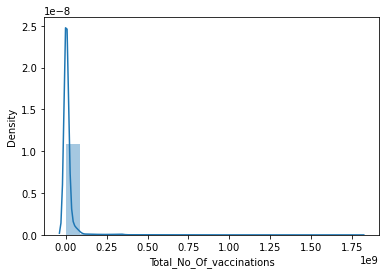

In [22]:
# Extreme values checks for Total number of vaccinations
sns.distplot(country_VCN['Total_No_Of_vaccinations'], bins=20)

In [23]:
# Check how many extreme values.

country_VCN[country_VCN['Total_No_Of_vaccinations'] >100000000]

,Country,geometry,iso_code,Date,Total_No_Of_vaccinations,Total_No_People_Vaccinated,Total_No_Of_People_Fully_Vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,Total_No_People_Vaccinated_Per_Hundred,Total_No_OF_People_Fully_Vaccinated_Per_Hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,_merge
4365,Brazil,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ...",BRA,01/07/2021,102780096.0,75783345.0,26996751.0,NaN,1408975.0,48.35,35.65,12.70,6629.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...,both
4368,Brazil,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ...",BRA,04/07/2021,105301611.0,77653882.0,27647729.0,NaN,1213850.0,49.54,36.53,13.01,5711.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...,both
4369,Brazil,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ...",BRA,05/07/2021,106909223.0,78950076.0,27959147.0,1607612.0,1427899.0,50.30,37.14,13.15,6718.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...,both
4370,Brazil,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ...",BRA,06/07/2021,107628177.0,79467536.0,28160641.0,718954.0,1257242.0,50.63,37.39,13.25,5915.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...,both
4371,Brazil,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ...",BRA,07/07/2021,110101829.0,81134483.0,28967346.0,2473652.0,1328291.0,51.80,38.17,13.63,6249.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28215,United States,"MULTIPOLYGON (((-134.97501 58.64583, -134.9213...",USA,04/08/2021,348102478.0,192614017.0,165334987.0,725329.0,677279.0,104.08,57.59,49.44,2025.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...,both
28216,United States,"MULTIPOLYGON (((-134.97501 58.64583, -134.9213...",USA,05/08/2021,348966419.0,193199353.0,165637566.0,863941.0,699261.0,104.34,57.77,49.53,2091.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...,both
28217,United States,"MULTIPOLYGON (((-134.97501 58.64583, -134.9213...",USA,06/08/2021,349787479.0,193764457.0,165918256.0,821060.0,694138.0,104.59,57.94,49.61,2076.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...,both
28218,United States,"MULTIPOLYGON (((-134.97501 58.64583, -134.9213...",USA,07/08/2021,350627188.0,194346486.0,166203176.0,839709.0,712389.0,104.84,58.11,49.70,2130.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...,both


In [24]:
# Clean extreme values.
country_VCN_Final = country_VCN[country_VCN['Total_No_Of_vaccinations'] < 100000000] 

In [25]:
country_VCN_Final.shape

(16710, 17)

In [26]:
# Saving the GeoDataFrame
country_VCN_Final.drop(columns ="_merge", inplace = True) 

C:\Users\Mukund\anaconda3\envs\geo_env\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
out = r"C:\Users\Mukund\Desktop\Career Foundry\Covid-19 Vaccination Progress\Data\Prepared_Data\Country_Vaccination.shp"
country_VCN_Final.to_file(out)

C:\Users\Mukund\AppData\Local\Temp/ipykernel_16400/2953391310.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  country_VCN_Final.to_file(out)


# Plotting a choropleth

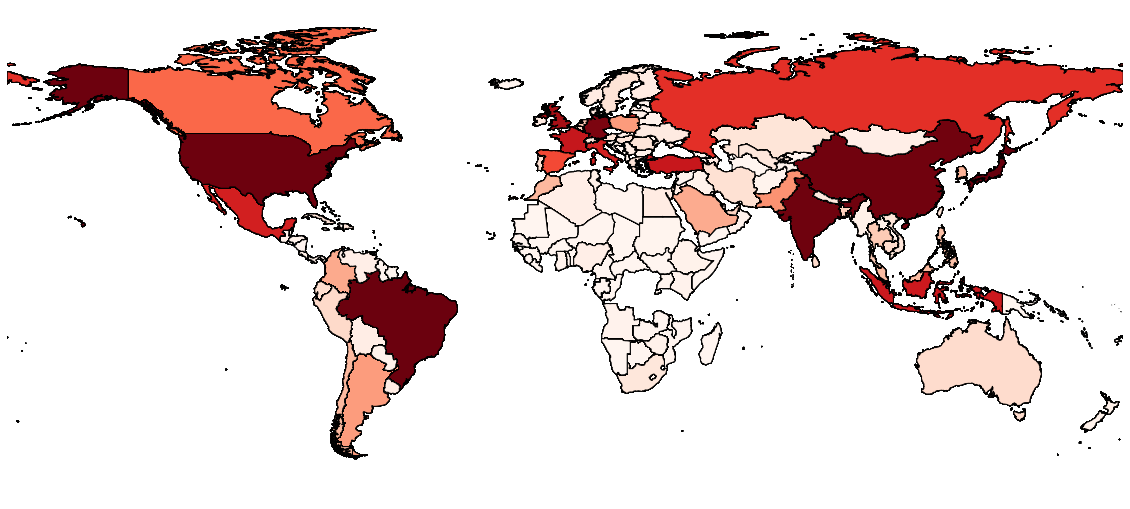

In [29]:
#Using Geoplot
gp = geoplot.choropleth(
    country_VCN_Final, hue = country_VCN_Final['Total_No_Of_vaccinations'], scheme = None,
    cmap='Reds', figsize=(20, 20)
)

We have created above world map using geoplot for total number of vaccinations i.e. the absolute number of total immunizations in the country. It represnts the sum of total vaccinations by country. We can see that there are many countries like China, India, USA, Japan, Brazil, Russia, Germany having the darkest color(Brown) representing the highest number of total vaccinations. 
On other hand, some countries from middle east and Africa having lighter shades of colors which represent less number of total vaccinations. The countries are Iran, Afganistan, Tajikistan, Algeria, Sudan, Egypt, South Africa, Zimbabwe etc.
From this visualization, we got the answers for two questions from our research questions. 
1. What are the top 10 countries in vaccination progress?(in term of total vaccinations)
2. Which 10 countries are lagging in vaccination? ?(in term of total vaccinations
But we can not see the exact count or total number or country's name from this map after hovering over it like we do get in tableau.